In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MatplotlibSettings
import pypartons

In [2]:
# Initalise PARTONS and get instance
p = pypartons.PARTONS
p.Partons.init()
inst = p.Partons.getInstance()

In [3]:
# Initalise GPD service and GPD model
gpdService = inst.getServiceObjectRegistry().getGPDService()
gpdModel = inst.getModuleObjectFactory().newGPDModule("GPDGK16")

21-09-2022 05:50:02 [INFO] (Partons::printVersion) PARTONS 3.0.0 (http://partons.cea.fr) distributed under GNU Public License
21-09-2022 05:50:02 [INFO] (Partons::printVersion) Git branch and revision of this version is python_interface/5864fad98ba3841f06b222bfd75157186b33eaf9
21-09-2022 05:50:02 [INFO] (Partons::printVersion) Built using Elementary-Utils 3.0.0 (master/ceb0ecb0eab58698f982261063f68509e85c662e) and NumA++ 3.0.0 (master/d84c72cb2af5ad69bcd67338b9fde081798eb34a)
21-09-2022 05:50:02 [WARN] (DatabaseManager::init) MYSQL database is currently not available ; Check your connection properties in partons.properties ; Or check if MYSQL server is installed -> (DatabaseManager::init) Can't connect to database : Can't connect to local MySQL server through socket '/tmp/mysql.sock' (2) QMYSQL: Unable to connect


In [4]:
# Compute GPD H of the up quark for some values of x
xl = np.logspace(-2, 0, num = 100)
H = np.array([gpdService.computeSingleKinematic(p.GPDKinematic(x, 0.2, -0.1, 2, 2), gpdModel).getPartonDistribution(p.GPDType.H).getQuarkDistribution(p.QuarkFlavor.UP).getQuarkDistribution() for x in xl])

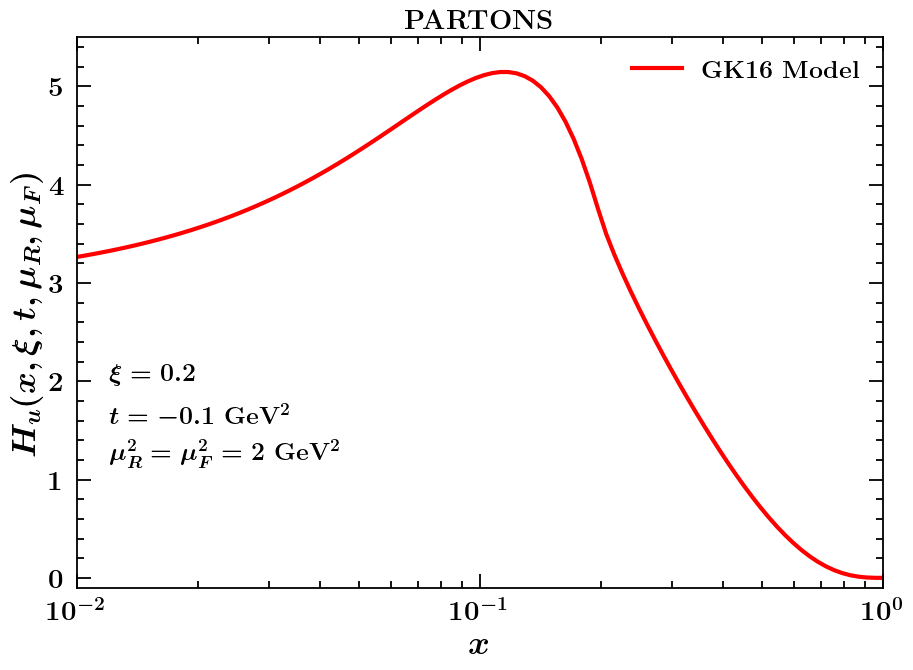

In [5]:
# Plot result with Matplotlib
plt.title(r"\textbf{PARTONS}", fontsize = 20)
plt.text(0.012, 2.0, r"\textbf{$\xi=0.2$}", fontsize = 18)
plt.text(0.012, 1.6, r"\textbf{$t=-0.1$~GeV$^2$}", fontsize = 18)
plt.text(0.012, 1.2, r"\textbf{$\mu_R^2=\mu_F^2=2$~GeV$^2$}", fontsize = 18)
plt.xlabel(r"\textbf{$x$}")
plt.ylabel(r"\textbf{$H_u(x,\xi,t,\mu_R,\mu_F)$}")
plt.xlim(0.01, 1)
plt.ylim(-0.1, 5.5)
plt.xscale("log")
plt.plot(xl, H, c = "red", linestyle = "-", label = r"\textbf{GK16 Model}")
plt.legend(fontsize = 18)

plt.show()
#plt.savefig("GK16_H.pdf")
plt.close()